## Literature Review and Host Model Construction Notebook

This notebook serves the purpose of gathering all of the essential knowledge for constructing or reconstructing a host model for the wound healing process. It also includes insights on how to simulate the pH of the wound and its change over time. Various approaches might be expounded and briefly explored if necessary.

### Singling Pathway Regulation: Pateint Side

Under this section, information manually curated and extracted from papers will be summarized as well as stored in a .csv file for later access.

#### Paper 01. Proteomic Analysis of Exudates from Chronic Ulcer of Diabetic Foot Treated with Scorpion Antimicrobial Peptide

**Authors**: Tan et al.

**Year**: 2022

**Journal**: Hindawi - Wiley Online Library

Positive correlation with wound healing:
* FOXM1 transcription factor
* activated FGFR1/ERK signling

Negative correlation:
* lnc-URIDS (lncRNA)

#### Paper 02. Diabetic Foot Ulcer Wound Healing and Tissue Regeneration: Signaling Pathways and Mechanisms

**Authors**: Salma Hegazi, Roaa Aly, Rowan Mesilhy and Hesham Aljohary

**Year**: 2023

**Journal**: InTechOpen (https://www.intechopen.com/chapters/1163573)

##### Abstract

"This chapter digs into the complexities of diabetic foot ulcer (DFU) wound healing, encompassing cellular responses from fibroblasts, keratinocytes, and macrophages, as well as humoral responses involving the release of growth factors and cytokines. The normal wound healing process is hindered in diabetics by factors like infections, venous insufficiency, impaired oxygenation, age-related changes, immune dysfunction, and a dry environment, contributing to delayed and challenging wound healing. The discussion then focuses on the intricate interplay of signaling cascades, including **PI3K/Akt**, **MAPK/ERK**, and **Wnt/β-catenin**, in the pathology of DFUs. Diabetes induces disruptions in the PI3K/Akt pathway, impeding cell migration and angiogenesis due to compromised insulin signaling and *increased oxidative stress*. Abnormalities in the MAPK pathway, essential for inflammation and tissue remodeling, further impact wound closure in DFUs. Additionally, downregulation of the Wnt/β-catenin pathway, crucial for tissue regeneration, contributes to immune dysfunction, delaying healing in diabetic wounds. Finally, the chapter explores multifaceted factors contributing to the pathogenesis of DFUs, including epigenetic modifications, oxidative stress, advanced glycation end products (AGEs), the polyol pathway, diacylglycerol-protein kinase C (DAG-PKC) activation, and the nitric oxide (NO) pathway. Persistent hyperglycemia in diabetes hinders wound healing, causing chronic ulcers and complications. Addressing these mechanisms is crucial for revolutionizing management."

| Pathway | Purterbation |
|---------|--------------|
| Wnt-B-catenin | Downreg. |
| PI3K/Akt | Downreg. |
| Glycation end products (AGEs) | Upreg. |
| NO pathway | Upreg. |
| DAG-PCK pathway | Upreg. |
| MAPK | Downreg. |
| ROS | Upreg. |

*Table 1*. The general regulative schema for skin, nerve, and immune cells involved in diabetic foot ulcers.


"Among the cells affected, **microvascular endothelial cells** are *particularly vulnerable to damage caused by hyperglycemia*. These cells struggle to adjust their glucose intake when faced with high glucose levels. It is believed that this damage occurs through four pathways: (1) the polyol pathway flux, (2) increased production of advanced glycation end products (*AGEs*) and activation of their receptor (*RAGE*), (3) activation of different forms of the *enzyme protein kinase C (PKC)* and (4) *overactivation of the hexosamine pathway*. They all lead to increased production of mitochondrial superoxide by the mitochondrial electron transport chain, which then transforms into other reactive oxygen species (ROS) leading to oxidative stress within the cell. This process also leads to the inhibition of an enzyme called glyceraldehyde 3 phosphate dehydrogenase (GAPDH). The activation of these pathways plays a role in microvascular disease and tissue damage seen in diabetic patients significantly contributing to the development of foot ulcers."

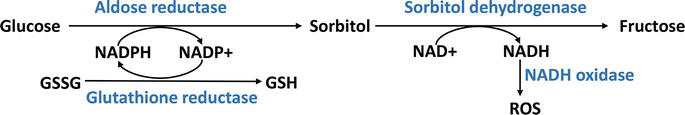


"The buildup of sorbitol and fructose within cells creates stress disrupting balance and hindering various essential functions required for effective wound healing. Osmotic stress causes swelling and damages cell membranes. Impairs the supply of nutrients and oxygen to the cells involved in the wound-healing process.

Moreover, converting *sorbitol into fructose generates NADH* that **stimulates ROS production** through dysfunction and activation of oxidative stress pathways. The increased production of ROS intensifies stress in DFUs causing harm to proteins, lipids, and DNA.

Activation of the polyol pathway also impacts cellular redox balance by altering the ratio between reduced glutathione (GSH) and oxidized glutathione (GSSG) affecting overall intracellular health.

The reduced GSH plays a role, as an antioxidant molecule while the oxidized GSSG serves as an indicator of stress. When there is an imbalance in the ratio of GSH to GSSG it disrupts the redox signaling system that’s essential for wound healing processes as illustrated in Figure 5. This disruption can impair functions and compromise tissue repair."

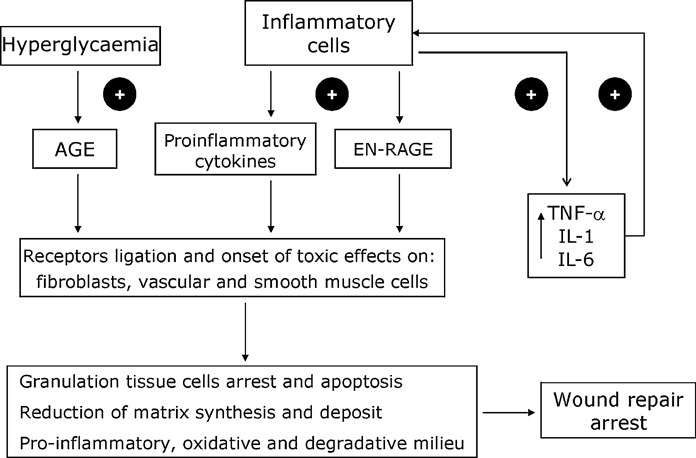

[Acosta et al., 2008](https://pmc.ncbi.nlm.nih.gov/articles/PMC7951400/) (The pro‐inflammatory environment in recalcitrant diabetic foot wounds
)

In [1]:
import cobra.io
recon3d = cobra.io.load_matlab_model('Recon3D_301.mat')
recon3d

No defined compartments in model Recon3D. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, i, l, m, n, r, x


Name,Recon3D
Memory address,24dc0bd0710
Number of metabolites,8399
Number of reactions,13543
Number of genes,3697
Number of groups,111
Objective expression,1.0*biomass_reaction - 1.0*biomass_reaction_reverse_32a6c
Compartments,"c, l, m, r, e, x, n, g, i"


### Reconstruction of Signaling Pathways from KEGG

Building on the insights extracted from the papers in the previous section, I have decided to start by working on the **AGE-RAGE pathway** involved in diabetic complications (including our contemporaneous concern, diabetic foot ulcers) as a major determining factor in inflammation, angiogenesis, and cellular migration, all of which strongly affect the outcome of the healing process. Another reason as to why I have chosen to work on this pathway is obviated by the fact that this is the only manually curated pathway available on KEGG PATHWAYS repository that can alone provide a suitable metric for wound healing and incorporates hyperglycemia and hypoxia all at once.

In [60]:
# Creating a function with the help of Copilot to load, parse, and extract
# pathway knowledge from a given kgml file or url.
import xml.etree.ElementTree as ET

#def download_kgml_file()

def load_kgml_file(kgml_file_path):
    """
    Loads a KGML file and return its XML root element.

    :param kgml_file_path: Path to the downloaded KGML file.
    :return: XML root element of the KGML file.
    """
    tree = ET.parse(kgml_file_path)
    return tree.getroot()

def get_kegg_relations_from_kgml(kgml_root):
    """
    Parses the KGML XML and extracts relation details.

    This function looks for <relation> elements in the KGML file. For each relation/reaction, it extracts:
      - The reaction id (from the 'id' attribute)
      - All lefthand entries (using the "entry1" attribute)
      - All righthand entries (using the "entry2" attribute)
      - The type of the interaction (using the "type" attribute)
    It then constructs a simple equation string in the form:
      "substrate1 + substrate2 <=> product1 + product2"

    :param kgml_root: XML root element from a KGML file.
    :return: Dictionary mapping reaction id to its details.
    """
    entry_db = get_entries_from_kgml(kgml_root)
    relations = {}
    for relation in kgml_root.findall("relation"):
        entry1 = relation.get("entry1") # Represents the entry "from" which the arrow starts
        entry2 = relation.get('entry2') # Represents the entry "to" which the arrow points
        type = relation.get('type') # PPI (PPrel), Enz-Enz (ECrel), Gene Exp. (GErel), or Prot-Comp. (PCrel).
        # Note that maplink types are unnecessary annotations and are ignored for now
        # These will be added in the future to support multiple pathway integration
        reaction = None
        # Finding the subtypes
        interaction_subtype = None
        for subtype in relation.findall('subtype'):
            if (subtype.get('name') == 'activation' or 'expression'):
                reaction = [entry_db[entry1], '+', entry_db[entry2]] # '+' indicates positive interaction
            elif (subtype.get('name') == 'inhibition' or 'repression'):
                reaction = [entry_db[entry1], '-', entry_db[entry2]] # '-' indicates negative interaction
        relations[entry1+entry2] = {
            'entry1': entry1,
            'entry2': entry2,
            'type': type,
            'gene1': entry_db[entry1]['name'].split(' '),
            'gene2': entry_db[entry2]['name'].split(' '),
            'prot1': None,
            'prot2': None,
            'reaction': reaction,
            'prot1_desc': None,
            'prot2_desc': None,
        }
    # Updating protein information based on their accession ids
    for id in relations.keys():
        get_genes_info(relations[id])
    return relations

def get_entries_from_kgml(kgml_root, skip_map = True, skip_cpd = False):
    entries = {}
    list_of_keys = [
        'id',
        'name',
        'type',
        'link',
        'full_name',
        'short'
    ]
    for entry in kgml_root.findall('entry'):
        id = entry.get(list_of_keys[0])
        name = entry.get(list_of_keys[1])
        type = entry.get(list_of_keys[2])
        if (type == 'map' and skip_map == True):
            continue
        if (type == 'compound' and skip_cpd == True):
            continue
        link = entry.get(list_of_keys[3])
        #id = entry.get(list_of_keys[4])
        # Creating a new entry with its unique id
        entries[id] = {
            list_of_keys[1]: name,
            list_of_keys[2]: type,
            list_of_keys[3]: link
        }
    return entries

# Loading requests library
import requests

import time
import requests

def get_genes_info(relation, max_retries=3, delay=5):
    """
    Updates the gene information in the 'relation' dictionary by querying KEGG.
    
    Parameters:
      - relation: dictionary containing keys 'gene1' and 'gene2' (lists of gene identifiers).
      - max_retries: Maximum number of attempts for each query.
      - delay: Time in seconds to wait between retries.
    """
    base_url = 'https://rest.kegg.jp/list/'
    
    # Create a persistent session
    session = requests.Session()

    # Helper function to fetch gene info for a given query.
    def fetch_gene_info(query):
        for attempt in range(max_retries):
            try:
                response = session.get(base_url + query, timeout=10)
                response.raise_for_status()
                return response.text.splitlines()
            except requests.exceptions.RequestException as e:
                print(f"Attempt {attempt+1}/{max_retries} for query '{query}' failed: {e}")
                time.sleep(delay)
        # Return an empty list if all retries fail.
        return []

    # Process gene1
    query_1 = '+'.join(relation['gene1'])
    lines = fetch_gene_info(query_1)
    relation['prot1'] = []
    for line in lines:
        parts = line.split()
        if len(parts) >= 2:
            geneID, geneName = parts[0], parts[1].split(',')[0]
            relation['prot1'].append(geneName)
        else:
            print(f"Unexpected format in gene1 line: {line}")

    # Process gene2
    query_2 = '+'.join(relation['gene2'])
    lines = fetch_gene_info(query_2)
    relation['prot2'] = []
    for line in lines:
        parts = line.split()
        if len(parts) >= 2:
            geneID, geneName = parts[0], parts[1].split(',')[0]
            relation['prot2'].append(geneName)
        else:
            print(f"Unexpected format in gene2 line: {line}")

    # Close the session when done.
    session.close()


In [37]:
# Loading the KGML file
kgml_file_path = 'hsa04933.xml'
kgml_file = load_kgml_file(kgml_file_path=kgml_file_path)

In [61]:
# Retrieving the model relations from the file
model_relations = get_kegg_relations_from_kgml(kgml_file)

In [62]:
model_relations['10232']

{'entry1': '102',
 'entry2': '32',
 'type': 'PPrel',
 'gene1': ['hsa:5879', 'hsa:998'],
 'gene2': ['hsa:1432', 'hsa:5600', 'hsa:5603', 'hsa:6300'],
 'prot1': ['RAC1', 'CDC42'],
 'prot2': ['MAPK14', 'MAPK11', 'MAPK13', 'MAPK12'],
 'reaction': [{'name': 'hsa:5879 hsa:998',
   'type': 'gene',
   'link': 'https://www.kegg.jp/dbget-bin/www_bget?hsa:5879+hsa:998'},
  '+',
  {'name': 'hsa:1432 hsa:5600 hsa:5603 hsa:6300',
   'type': 'gene',
   'link': 'https://www.kegg.jp/dbget-bin/www_bget?hsa:1432+hsa:5600+hsa:5603+hsa:6300'}],
 'prot1_desc': None,
 'prot2_desc': None}

In [ ]:
import pandas as pd
relations_df = pd.DataFrame(model_relations)
relations_df.to_csv('../host_model/AGE_RAGE_model_relations.csv')

#### Model Construction

Positive interactions ($A_x$ for the activator and the $A_y$ for the activated protein):
$$
A_x \rightarrow \alpha \times A_y
$$

And for negative interactions:

$$
B_i + \beta \times A_x \rightarrow B_i
$$

In [18]:
import cobra
from cobra import Model, Reaction, Metabolite

def pos_reaction(model : cobra.Model, activator_id, activated_id, alpha=1.0, rxn_id=None, rxn_name=None, compartment="c"):
    """
    Constructs reaction for a ***positive*** interaction or relation between two or more proteins, receptors, ligands, and compounds.
    
    This reaction consumes the activator and produces the activated protein
    with an amplification factor alpha.
    
    Parameters:
      model         : A COBRApy model.
      activator_id  : ID (string) of the activator metabolite.
      activated_id  : ID (string) of the activated metabolite.
      alpha         : Amplification parameter (default 1.0).
      rxn_id        : (Optional) Reaction ID. If None, one is automatically generated.
      rxn_name      : (Optional) Reaction name.
      compartment   : Compartment where the metabolites reside (default "c").
    
    Returns:
      The created COBRApy Reaction object.
    """
    # Ensuring activator exists
    if activator_id in model.metabolites:
        activator = model.metabolites.get_by_id(activator_id)
    else:
        activator = Metabolite(activator_id, compartment=compartment)
        model.add_metabolites([activator])
        
    # Ensuring activated protein exists
    if activated_id in model.metabolites:
        activated = model.metabolites.get_by_id(activated_id)
    else:
        activated = Metabolite(activated_id, compartment=compartment)
        model.add_metabolites([activated])
    
    # Creating the reaction
    reaction_id = rxn_id if rxn_id is not None else f"pos_{activator_id}_to_{activated_id}"
    reaction = Reaction(reaction_id)
    reaction.name = rxn_name if rxn_name is not None else f"Activation: {activator_id} -> {activated_id}"
    reaction.lower_bound = 0    # The interactions are not reversibly applicable
    reaction.upper_bound = 1000 # There is no particular upper bound set
    
    # Stoichiometry: consumes 1 unit of activator, produces alpha units of activated protein.
    reaction.add_metabolites({activator: -1.0, activated: alpha})
    
    model.add_reactions([reaction])
    return reaction

def neg_reaction(model : cobra.Model, inhibitor_id, inhibited_id, beta=1.0, rxn_id=None, rxn_name=None, compartment="c", method = "coupled"):
    """
    Constructs reaction for a ***negative*** interaction or relation between two or more proteins, receptors, ligands, and compounds.
    
    Here we adopt the "demand" (or drain) approach. This reaction is intended to
    remove or siphon the inhibited metabolite. For clarity, the reaction is defined as:
    
         inhibited_metabolite -> waste
    
    with the removal scaled by beta. (The inhibitor is not stoichiometrically consumed
    but is referenced in the reaction ID/name to indicate the negative interaction.)
    
    Parameters:
      model         : A COBRApy model.
      inhibitor_id  : ID (string) of the inhibitor metabolite (used only for naming).
      inhibited_id  : ID (string) of the inhibited metabolite, which will be drained.
      beta          : Amplification parameter for the sinking effect (default 1.0).
      rxn_id        : (Optional) Reaction ID. If None, one is automatically generated.
      rxn_name      : (Optional) Reaction name.
      compartment   : Compartment for metabolite (default "c").
      method        : Represents the method by which negative interactions are implemented. Could be *"coupled"* or *"uncoupled"*.
    
    Returns:
      The created COBRApy Reaction (`cobra.Reaction`) object.
    """
    # Ensure the inhibited metabolite exists
    if inhibited_id in model.metabolites:
        inhibited = model.metabolites.get_by_id(inhibited_id)
    else:
        inhibited = Metabolite(inhibited_id, compartment=compartment)
        model.add_metabolites([inhibited])
    
    # Ensuring the inhibitor exists
    if inhibitor_id in model.metabolites:
        inhibitor = model.metabolites.get_by_id(inhibitor_id)
    else:
        inhibitor = Metabolite(inhibitor_id, compartment=compartment)
        model.add_metabolites([inhibitor])
    
    # Bifuricating the workflow based on the chosen method
    if (method == "uncoupled"):
        # Create a “waste” metabolite if not already present
        waste_id = "waste"
        if waste_id in model.metabolites:
            waste = model.metabolites.get_by_id(waste_id)
        else:
            waste = Metabolite(waste_id, compartment=compartment)
            model.add_metabolites([waste])
        
        # Defining the reaction ID and name.
        reaction_id = rxn_id if rxn_id is not None else f"neg_{inhibitor_id}_inhibits_{inhibited_id}"
        reaction = Reaction(reaction_id)
        reaction.name = rxn_name if rxn_name is not None else f"Inhibition: {inhibitor_id} lowers {inhibited_id}"
        reaction.lower_bound = 0
        reaction.upper_bound = 1000
        
        # Create a demand/drain reaction: it removes the inhibited metabolite (scaled by beta) and converts it into waste.
        # Stoichiometry: -beta for inhibited, +beta for waste.
        reaction.add_metabolites({inhibited: -beta, waste: beta})
        model.add_reactions([reaction])
    
    return reaction

def construct_model(relations : pd.DataFrame) -> cobra.Model:
    """
    Constructs a host signaling model from scratch in COBRApy using the defined
    positive and negative interaction reactions.
    
    Returns:
      A COBRApy Model object representing the signaling network.
    """
    host_model = Model("host_signaling_model")

    for relation in relations:
        rel_id = relation['id']
        if relation['reaction'][1] == '+': # If the "operator" is positive/activation
            pos_reaction(host_model,relation['prot1'][0], relation['prot2'][0])
        else:
            neg_reaction(host_model, relation['prot1'][0], relation['prot2'][0])

    # Example: a positive interaction where metabolite 'A' activates 'A_activated'
    # pos_rxn = pos_reaction(host_model, activator_id="A", activated_id="A_activated", alpha=2.0)
    
    # Example: a negative interaction where 'X' inhibits 'B'
    # neg_rxn = neg_reaction(host_model, inhibitor_id="X", inhibited_id="B", beta=1.0)
    
    # One can continue adding conventional reactions, transporters, demand reactions, etc.
    # to build up a complete host signaling model.
    
    return host_model


In [19]:
import pandas as pd
age_rage_relations = pd.read_csv('AGE_RAGE_model_relations.csv')

In [21]:
age_rage_relations

,attribute,3840,16840,3943,4344,17538,175168,1409,9177,9150,...,9575,9674,5649,5650,5654,5651,5647,5646,5648,191175
0,entry1,38,168,39,43,175,175,140,9,9,...,95,96,56,56,56,56,56,56,56,191
1,entry2,40,40,43,44,38,168,9,177,150,...,75,74,49,50,54,51,47,46,48,175
2,type,PPrel,PPrel,PPrel,PPrel,PPrel,PPrel,PCrel,PPrel,PPrel,...,PCrel,PPrel,GErel,GErel,GErel,GErel,GErel,GErel,GErel,PPrel
3,gene1,"['hsa:7042', 'hsa:7043']",['hsa:7040'],['hsa:7046'],"['hsa:4087', 'hsa:4088']",['hsa:185'],['hsa:185'],"['cpd:C21011', 'cpd:C21012', 'cpd:C21013', 'cp...",['hsa:177'],['hsa:177'],...,['cpd:C00195'],['hsa:4846'],['hsa:3725'],['hsa:3725'],['hsa:3725'],['hsa:3725'],['hsa:3725'],['hsa:3725'],['hsa:3725'],['hsa:183']
4,gene2,['hsa:7048'],['hsa:7048'],"['hsa:4087', 'hsa:4088']",['hsa:4089'],"['hsa:7042', 'hsa:7043']",['hsa:7040'],['hsa:177'],"['hsa:1536', 'hsa:27035', 'hsa:50507']","['hsa:113026', 'hsa:23236', 'hsa:51196', 'hsa:...",...,"['hsa:1432', 'hsa:5600', 'hsa:5603', 'hsa:6300']","['hsa:5599', 'hsa:5601', 'hsa:5602']","['hsa:3552', 'hsa:3553']",['hsa:3569'],['hsa:3576'],['hsa:7124'],['hsa:2152'],['hsa:1906'],['hsa:7056'],['hsa:185']
5,prot1,"['TGFB2', 'TGFB3']",['TGFB1'],['TGFBR1'],"['SMAD2', 'SMAD3']",['AGTR1'],['AGTR1'],['[Protein]-N(epsilon)-(carboxymethyl)lysine;'...,['AGER'],['AGER'],...,['N-Acylsphingosine;'],['NOS3'],['JUN'],['JUN'],['JUN'],['JUN'],['JUN'],['JUN'],['JUN'],['AGT']
6,prot2,['TGFBR2'],['TGFBR2'],"['SMAD2', 'SMAD3']",['SMAD4'],"['TGFB2', 'TGFB3']",['TGFB1'],['AGER'],"['CYBB', 'NOX1', 'NOX4']","['PLCD3', 'PLCB1', 'PLCE1', 'PLCB2', 'PLCB3', ...",...,"['MAPK14', 'MAPK11', 'MAPK13', 'MAPK12']","['MAPK8', 'MAPK9', 'MAPK10']","['IL1A', 'IL1B']",['IL6'],['CXCL8'],['TNF'],['F3'],['EDN1'],['THBD'],['AGTR1']
7,reaction,"[{'name': 'hsa:7042 hsa:7043', 'type': 'gene',...","[{'name': 'hsa:7040', 'type': 'gene', 'link': ...","[{'name': 'hsa:7046', 'type': 'gene', 'link': ...","[{'name': 'hsa:4087 hsa:4088', 'type': 'gene',...","[{'name': 'hsa:185', 'type': 'gene', 'link': '...","[{'name': 'hsa:185', 'type': 'gene', 'link': '...",[{'name': 'cpd:C21011 cpd:C21012 cpd:C21013 cp...,"[{'name': 'hsa:177', 'type': 'gene', 'link': '...","[{'name': 'hsa:177', 'type': 'gene', 'link': '...",...,"[{'name': 'cpd:C00195', 'type': 'compound', 'l...","[{'name': 'hsa:4846', 'type': 'gene', 'link': ...","[{'name': 'hsa:3725', 'type': 'gene', 'link': ...","[{'name': 'hsa:3725', 'type': 'gene', 'link': ...","[{'name': 'hsa:3725', 'type': 'gene', 'link': ...","[{'name': 'hsa:3725', 'type': 'gene', 'link': ...","[{'name': 'hsa:3725', 'type': 'gene', 'link': ...","[{'name': 'hsa:3725', 'type': 'gene', 'link': ...","[{'name': 'hsa:3725', 'type': 'gene', 'link': ...","[{'name': 'hsa:183', 'type': 'gene', 'link': '..."
8,prot1_desc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,prot2_desc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import cobra

def posReaction(model : cobra.Model, reaction : list, prot1 : list, prot2 : list):
    """
    Constructs reaction for a positive interaction or relation between two or more proteins, receptors, ligands, and compounds.

    Parameters:
     - `model`: *list*
     - `reaction`: *list*
     - `prot1`
     - `prot2`
    """
    